In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### torch.multinomial()

In [2]:
#define a probability tensor
probabilities = torch.tensor([0.1, 0.9])
#ex a rv has 0.1 or 10% probability of values being 0 and 0.9 or 90% probability of value being 1
#draw 10 samples from multinomial distrobution
samples = torch.multinomial(probabilities, num_samples = 10, replacement = True)
print(samples)

tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1])


In [3]:
probabilities = torch.tensor([0.25, 0.25, 0.5])
#ex a rv has 0.25 or 25% probability of values being 0 and 0.25 or 25% probability of value being 1 and 0.5 or 50% probability of value being 2
#draw 10 samples from multinomial distrobution
samples = torch.multinomial(probabilities, num_samples = 10, replacement = True)
print(samples)

tensor([2, 1, 2, 2, 2, 2, 2, 0, 2, 2])


### torch.cat()

In [4]:
tensor = torch.tensor([1,2,3,4,5])
out = torch.cat((tensor, torch.tensor([5])), dim = 0)
out

tensor([1, 2, 3, 4, 5, 5])

In [5]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
extra_row = torch.tensor([[5, 0, 0]])  # Create a 1x3 tensor to match the number of columns in 'tensor'
out = torch.cat((tensor, extra_row), dim=0)
out

tensor([[1, 2, 3],
        [4, 5, 6],
        [5, 0, 0]])

In [6]:
tensor1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor2 = torch.tensor([[7], [8]])  # Create a 2x1 tensor to concatenate along columns

out = torch.cat((tensor1, tensor2), dim=1)

print(out)

tensor([[1, 2, 3, 7],
        [4, 5, 6, 8]])


In [7]:
a = torch.zeros(3,3)
x = torch.ones(3,1)
print(x)
a_dash = torch.cat((a,x), dim = 1)
y = torch.ones(1,4)
a_dash = torch.cat((a_dash,y), dim = 0)
print(a_dash)

tensor([[1.],
        [1.],
        [1.]])
tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 1., 1., 1.]])


### torch.tril() and troch.triu()

In [8]:
#triangle lower
torch.tril(torch.ones(5,5))

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [9]:
#triangle upper
torch.triu(torch.ones(5,5))

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

### masked fill

In [12]:
torch.tril(torch.ones(5,5))

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [10]:
y = torch.triu(torch.ones(5,5)) * float('-inf')
y

out = torch.zeros(5, 5).masked_fill(torch.tril(torch.ones(5,5)) == 0, float('-inf'))
out

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [11]:
x = torch.exp(torch.tensor([1,1]))
x

tensor([2.7183, 2.7183])

In [12]:
#torch.exp(1) = 2.71^1 = 2.71
#torch.exp(0) = 2.71^0 = 1
#torch.exp(-inf) = 2.71^-inf = 0
torch.exp(out)

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

### torch.transpose()

In [10]:
#transposing dims
x = torch.ones(1,2,3)
print(x)
y = x.transpose(0,2) #0th dim being interchainges with 2nd dim
print(y)
print(y.shape)

tensor([[[1., 1., 1.],
         [1., 1., 1.]]])
tensor([[[1.],
         [1.]],

        [[1.],
         [1.]],

        [[1.],
         [1.]]])
torch.Size([3, 2, 1])


### torch.stack()

In [14]:
t1 = torch.rand(3)
t2 = torch.rand(3)
t3 = torch.rand(3)

#stacking along a new dim
stacked_tensor = torch.stack([t1,t2,t3])
print(stacked_tensor, stacked_tensor.shape)

tensor([[0.5206, 0.5098, 0.7202],
        [0.2938, 0.4226, 0.4245],
        [0.6580, 0.1517, 0.7675]]) torch.Size([3, 3])


In [15]:
import torch.nn as nn

Linear = nn.Linear(3,3, bias = False)

In [16]:
print(list(Linear.parameters()))  #these parameters are learnable

[Parameter containing:
tensor([[-0.4734, -0.2784, -0.1956],
        [ 0.5740, -0.5030, -0.0488],
        [-0.4962, -0.2982, -0.4835]], requires_grad=True)]


In [17]:
tensor = torch.tensor([1,2,3], dtype = torch.float)
print(Linear(tensor))

tensor([-1.6170, -0.5785, -2.5432], grad_fn=<SqueezeBackward4>)


In [18]:
a = torch.tensor([ 0.4755, -0.5154,  0.5246])
print(a, a.shape)

tensor([ 0.4755, -0.5154,  0.5246]) torch.Size([3])


In [19]:
b = torch.tensor([1,2,3], dtype = torch.float)
print(b, b.shape)

tensor([1., 2., 3.]) torch.Size([3])


In [20]:
print(sum(a*b))

tensor(1.0185)


In [21]:
Linear = nn.Linear(2,1, bias = False)

In [22]:
print(list(Linear.parameters()))

[Parameter containing:
tensor([[-0.6422,  0.1918]], requires_grad=True)]


In [23]:
b = torch.tensor([1,2], dtype = torch.float)
print(b, b.shape)

tensor([1., 2.]) torch.Size([2])


In [24]:
out = Linear(b)
out

tensor([-0.2586], grad_fn=<SqueezeBackward4>)

In [25]:
b = torch.tensor([1,2], dtype = torch.float)
print(b, b.shape)
a = torch.tensor([-0.1978,  0.4393])

print(sum(a*b))

tensor([1., 2.]) torch.Size([2])
tensor(0.6808)


### Softmax function

In [26]:
import torch.nn.functional as F

tensor = torch.tensor([1,2,3], dtype = torch.float32)
#F(z) = 1/(1 + e^-z)
softmax = F.softmax(tensor, dim=0)
print(softmax)

tensor([0.0900, 0.2447, 0.6652])


In [27]:
sigmoid = F.sigmoid(tensor)
sigmoid

tensor([0.7311, 0.8808, 0.9526])

In [28]:
sigmoid = lambda z: (1/(1 + torch.exp(-z)))

In [29]:
print(sigmoid(tensor))

tensor([0.7311, 0.8808, 0.9526])


In [30]:
linspace = torch.linspace(3, 10, steps=8)

In [31]:
softmax = lambda z: torch.exp(z)/(sum(torch.exp(z)))

In [32]:
tensor = torch.tensor([1,2,3], dtype = torch.float32)
#F(z) = 1/(1 + e^-z)
softmax_out = F.softmax(tensor, dim=0)
softmax = lambda z: torch.exp(z)/(sum(torch.exp(z)))
print(softmax_out, softmax(tensor))

tensor([0.0900, 0.2447, 0.6652]) tensor([0.0900, 0.2447, 0.6652])


In [33]:
import matplotlib.pyplot as plt

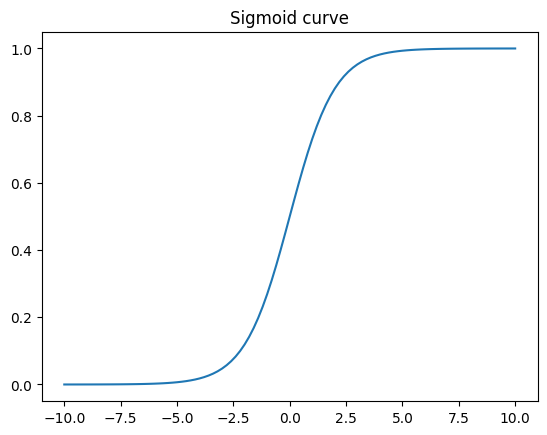

In [34]:
sigmoid = lambda z: (1/(1 + torch.exp(-z)))
linspace = torch.linspace(-10, 10, 101)
plt.plot(linspace, sigmoid(linspace))
plt.title('Sigmoid curve')
plt.show()

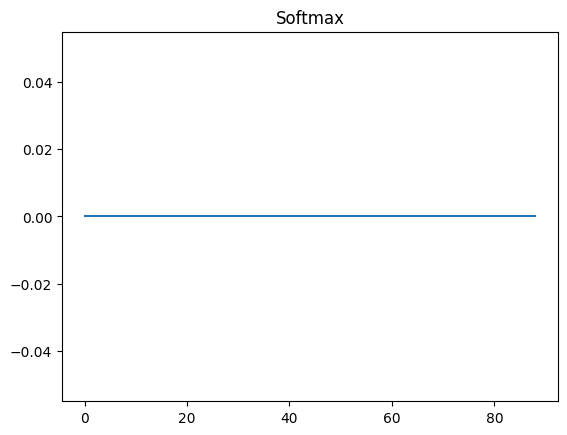

In [35]:
softmax = lambda z: torch.exp(z)/(sum(torch.exp(z)))
linspace = torch.linspace(0, 100, 101)
plt.plot(linspace, softmax(linspace))
plt.title('Softmax')
plt.show()

### Embedding layer

In [36]:
vocab_size = 86 # from bigram model
embedding_Dim = 100
embedding = nn.Embedding(vocab_size, embedding_Dim)

embedding_parameters = list(embedding.parameters())

print(embedding_parameters[0].shape, len(embedding_parameters))

hello_encodings = torch.tensor([56, 53, 60, 60, 63])

embedded_output = embedding(hello_encodings)

print(embedded_output.shape)

torch.Size([86, 100]) 1
torch.Size([5, 100])


In [13]:
hello_encodings = torch.tensor([56, 53, 60, 60, 63])
print(hello_encodings.shape)

torch.Size([5])


In [38]:
vocab_size = 86 # from bigram model
embedding = nn.Embedding(vocab_size, vocab_size)

embedding_parameters = list(embedding.parameters())

print(embedding_parameters[0].shape, len(embedding_param eters))

hello_encodings = torch.tensor([56, 53, 60, 60, 63])

embedded_output = embedding(hello_encodings)

print(embedded_output.shape)

torch.Size([86, 86]) 1
torch.Size([5, 86])


In this case, the input tensor with a length of 5 means we're looking up embeddings for 5 specific indices out of the total 86 in your vocabulary. The output is a tensor with shape [5, 100], where each row corresponds to one of the 5 input indices, and each row contains the 100-dimensional embedding vector for that index.

In [169]:
a = torch.tensor([1,2,3])
b = torch.tensor([1,2,3])
print(sum(a*b), torch.dot(a,b))

tensor(14) tensor(14)


In [177]:
a = torch.tensor([[1,2], [3,4], [5,6]])
print(a.shape)
b = torch.tensor([[7,8,9], [10,11,12]])
print(b.shape)
print(a@b, torch.matmul(a,b))

torch.Size([3, 2])
torch.Size([2, 3])
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]]) tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [181]:
Linear = nn.Linear(3,3, bias = False)
tensor = torch.tensor([[1,2,3], [4,5,6]], dtype = torch.float)
print(Linear(tensor))

tensor([[-0.3534,  1.1887, -0.9036],
        [-0.1809,  1.7282, -1.4746]], grad_fn=<MmBackward0>)


In [200]:
import torch.nn as nn

Linear = nn.Linear(3,3, bias = False)
tensor = torch.tensor([[1,2,3], [4,5,6]], dtype = torch.float)

print(f"Linear Output:  {Linear(tensor)}")

params = (list(Linear.parameters()))
print(tensor, params[0])
print(tensor@params[0].T)

Linear Output:  tensor([[-1.1620, -0.4910, -0.7085],
        [-2.6866, -1.1190, -2.8460]], grad_fn=<MmBackward0>)
tensor([[1., 2., 3.],
        [4., 5., 6.]]) Parameter containing:
tensor([[-0.0694, -0.2236, -0.2151],
        [-0.3312,  0.5254, -0.4035],
        [-0.4473, -0.5345,  0.2693]], requires_grad=True)
tensor([[-1.1620, -0.4910, -0.7085],
        [-2.6866, -1.1190, -2.8460]], grad_fn=<MmBackward0>)


### .view() 

In [45]:
a = torch.rand(2,2,2)
a

tensor([[[0.6982, 0.7794],
         [0.8029, 0.2196]],

        [[0.2207, 0.0576],
         [0.4873, 0.3082]]])

In [46]:
a.shape

torch.Size([2, 2, 2])

In [47]:
a = a.view(a.shape[0]*a.shape[1], a.shape[2])
a

tensor([[0.6982, 0.7794],
        [0.8029, 0.2196],
        [0.2207, 0.0576],
        [0.4873, 0.3082]])

In [48]:
a.shape

torch.Size([4, 2])

In [ ]:
nn.Embedding(vocab_size, vocab_size)

### Activation Functions

#### ReLU

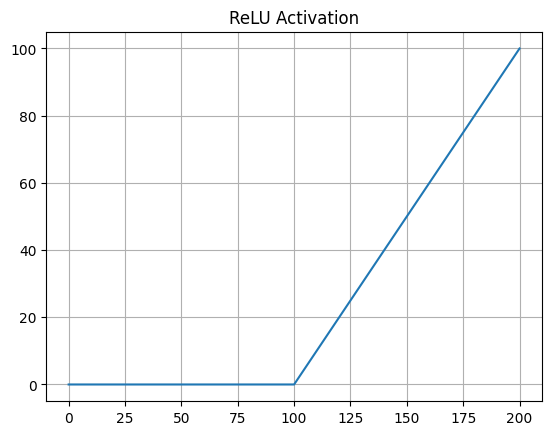

In [70]:
m = nn.ReLU()
input = torch.linspace(-100, 100, 201)
output = m(input)
plt.plot(output)
plt.grid()
plt.title('ReLU Activation')
plt.show()

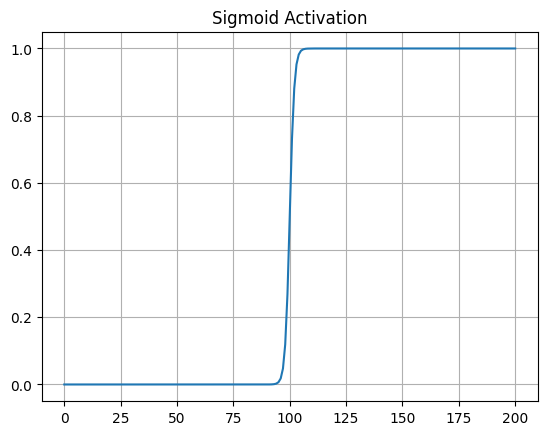

In [69]:
m = nn.Sigmoid()
input = torch.linspace(-100, 100, 201)
output = m(input)
plt.plot(output)
plt.grid()
plt.title('Sigmoid Activation')
plt.show()

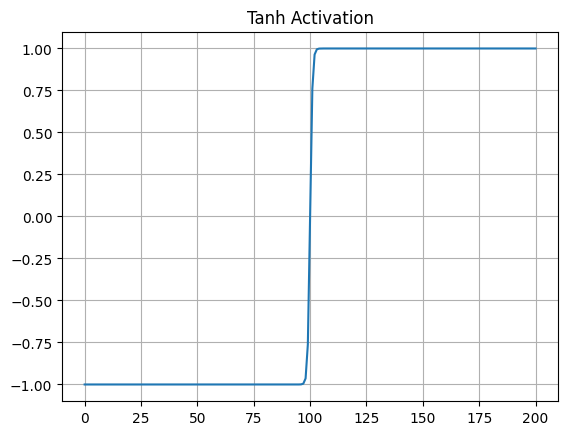

In [68]:
m = nn.Tanh()
input = torch.linspace(-100, 100, 201)
output = m(input)
plt.plot(output)
plt.title('Tanh Activation')
plt.grid()
plt.show()

gpt Model

In [9]:
import torch.nn as nn
block_size = 8
n_embedd = 384
vocab_size = 86 # from bigram model

embedding = nn.Embedding(vocab_size, n_embedd)  #character level in context of the vocab size (wrt vocabulary)
positional = nn.Embedding(block_size, n_embedd)#positional_embedding = nn.Embedding(block_size, n_embedd) #postion of each character in a block input- position in context of each charater appearing in the block (wrt position of each character in a block)

embedding_parameters = list(embedding.parameters())

print(f'Token embedding parameters: {embedding_parameters[0].shape, len(embedding_parameters)}')

input_seq = torch.randint(86, (4,8))
print(f'input sequence shape: {input_seq.shape}')

embedded_output = embedding(input_seq)
print(f'token embedding output shape: {embedded_output.shape}')

B,T,C = embedded_output.shape

positional_embed = positional(torch.arange(T))
print(f'positional embedding output shape: {positional_embed.shape}')

x = embedded_output + positional_embed #broadcasting
print(f'output shape: {x.shape}')

Token embedding parameters: (torch.Size([86, 384]), 1)
input sequence shape: torch.Size([4, 8])
token embedding output shape: torch.Size([4, 8, 384])
positional embedding output shape: torch.Size([8, 384])
output shape: torch.Size([4, 8, 384])


### ViT 

### nn.Parameter:
In PyTorch, nn.Parameter is a class that is used to define parameters (tensors) that are meant to be updated during the training process of a neural network. It is a wrapper for tensors that are registered as parameters of a module when assigned as an attribute to an nn.Module subclass.

In [10]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size:int = 16, embedding_dim:int = 768):  #embedding dim = patch_size * num_channels = 16*16*3 = 768
        super().__init__()
        #convert image in patches
        self.patch = nn.Conv2d(in_channels = in_channels, 
                               out_channels= embedding_dim, 
                               kernel_size=patch_size,
                                stride=patch_size, padding = 0) #ouput = 14*14*768  
        ## output dim - 14 *14 patches each of size (16*16*3) ->768
        ##falttening the patch feature maps into single dim
        self.flatten = nn.Flatten(start_dim = 2, end_dim = 3)
    def forward(self,x):
        x_patched = self.patch(x)
        print(f'patched dim: {x_patched.shape}')
        x_flatten = self.flatten(x_patched)
        print(f'flatten dim: {x_flatten.shape}')
        return x_flatten.permute(0,2,1)  #adjusting (1,768,196) so embedding is on the final dim = (batch_size, 196,768)  

In [19]:
batch_size = 32
embedding_dim = 768
height = 224
width = 224
patch_size = 16
in_channels=3

create_patch = PatchEmbedding(in_channels, patch_size, embedding_dim)

random_tensor = torch.rand((batch_size,3,width,height))  #(batch_size, in_channels, height, width)
patched_output = create_patch(random_tensor)
print(f'patched ouput shape: {patched_output.shape}')

tokens = nn.Parameter(torch.ones(batch_size, 1, embedding_dim ), requires_grad = True)  ##learnable parameters
print(f'tokens shape for token embedding: {tokens.shape}')

##concatenating tokens
patch_embedding_with_class_tokens = torch.cat([tokens, patched_output], dim =1)
print(f'shape after concatenation: {patch_embedding_with_class_tokens.shape}')

##position embedding 
number_of_patches = (height*width) // (patch_size**2)  #14*14 = 196

positional_encoding = nn.Parameter(torch.ones(1, number_of_patches + 1, embedding_dim), requires_grad = True)
print(f'tokens shape for position embedding: {positional_encoding.shape}')

embedd_output = patch_embedding_with_class_tokens + positional_encoding

print(f'Embedding ouput: {embedd_output.shape}')
                                   

patched dim: torch.Size([32, 768, 14, 14])
flatten dim: torch.Size([32, 768, 196])
patched ouput shape: torch.Size([32, 196, 768])
tokens shape for token embedding: torch.Size([32, 1, 768])
shape after concatenation: torch.Size([32, 197, 768])
tokens shape for position embedding: torch.Size([1, 197, 768])
Embedding ouput: torch.Size([32, 197, 768])
